### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/india_housing_cleaned.csv")
df.head()


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Price_Category,Property_Age_Group,Parking_Score,Security_Score,Amenity_Score,clubhouse,garden,gym,playground,pool
0,1,tamil nadu,chennai,locality_84,apartment,1,4740,489.76,10332.489451,1990,...,premium,old,0,0,13,1,1,1,1,1
1,2,maharashtra,pune,locality_490,independent house,3,2364,195.52,8270.727580,2008,...,mid,old,0,1,10,1,1,1,1,1
2,3,punjab,ludhiana,locality_167,apartment,2,3642,183.79,5046.403075,1997,...,mid,old,1,0,18,1,0,1,1,1
3,4,rajasthan,jodhpur,locality_393,independent house,2,2741,300.29,10955.490697,1991,...,mid,old,1,1,14,1,1,1,1,1
4,5,rajasthan,jaipur,locality_466,villa,4,4823,182.90,3792.245490,2002,...,mid,old,0,1,14,1,1,1,1,1


In [2]:
sns.set(style="whitegrid", palette="pastel")


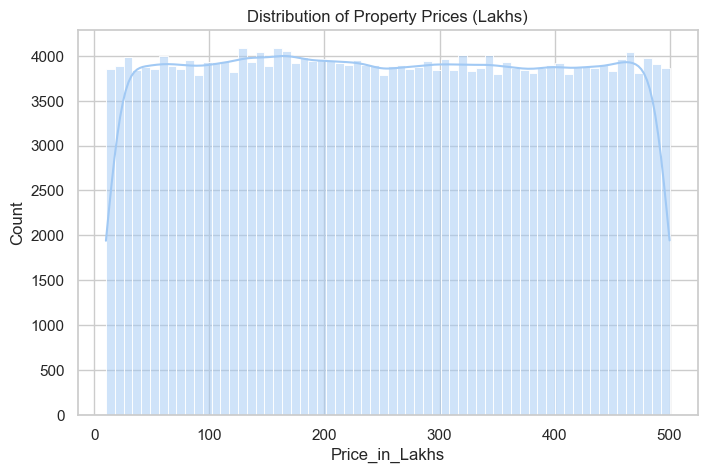

In [3]:
#🏷 Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price_in_Lakhs"], kde=True)
plt.title("Distribution of Property Prices (Lakhs)")
plt.show()


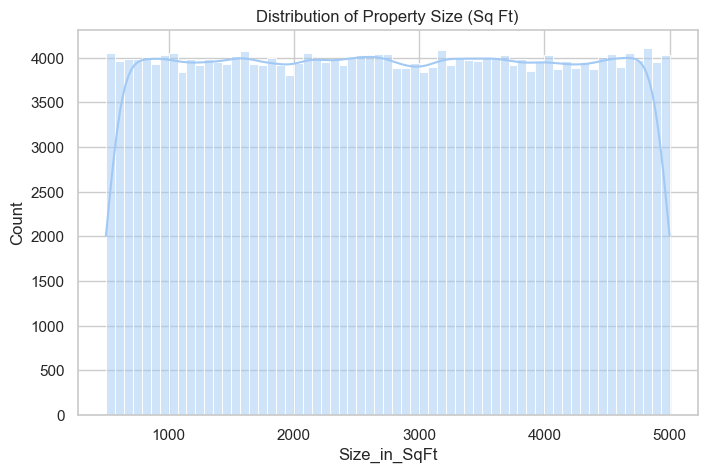

In [4]:
#📐 Size Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Size_in_SqFt"], kde=True)
plt.title("Distribution of Property Size (Sq Ft)")
plt.show()


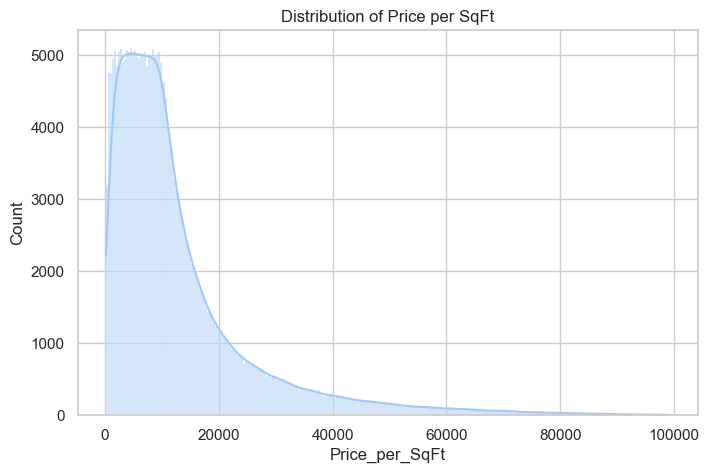

In [5]:
#Price per Sq Ft
plt.figure(figsize=(8,5))
sns.histplot(df["Price_per_SqFt"], kde=True)
plt.title("Distribution of Price per SqFt")
plt.show()


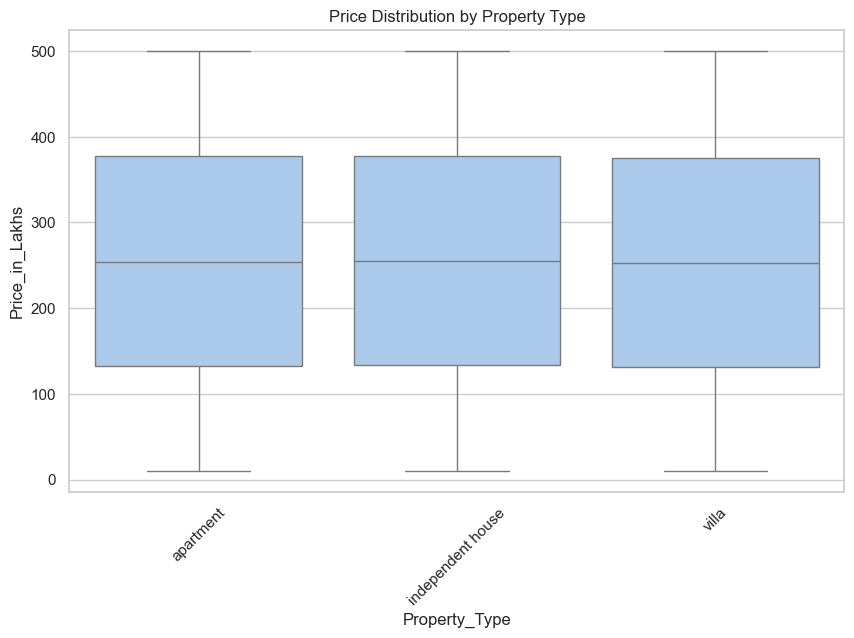

In [6]:
#Property Type vs Price
plt.figure(figsize=(10,6))
sns.boxplot(x="Property_Type", y="Price_in_Lakhs", data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Property Type")
plt.show()


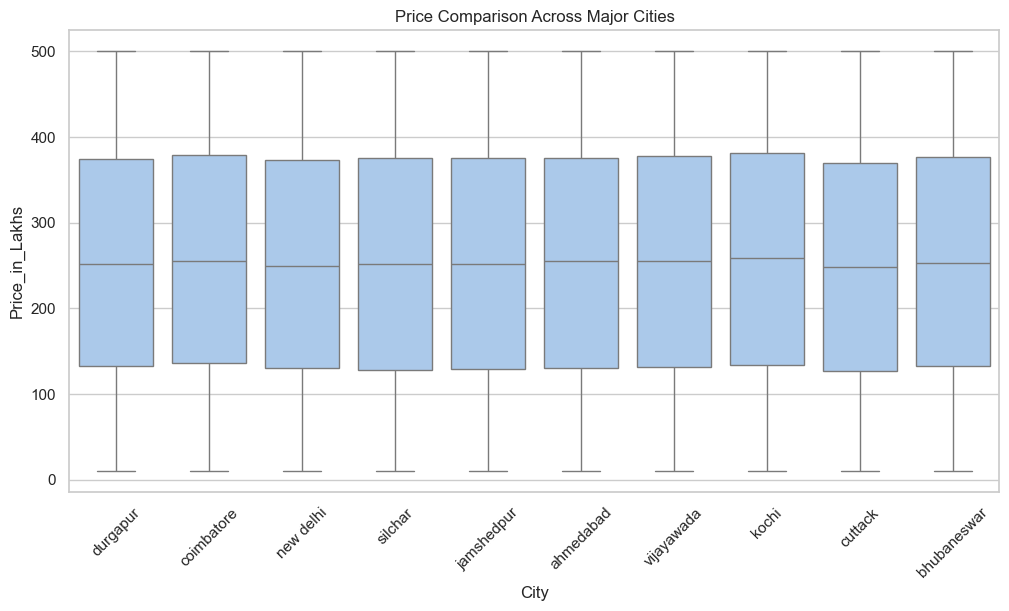

In [7]:
#City vs Price (Top 10 Cities)
top_cities = df['City'].value_counts().head(10).index
city_df = df[df['City'].isin(top_cities)]

plt.figure(figsize=(12,6))
sns.boxplot(x="City", y="Price_in_Lakhs", data=city_df)
plt.xticks(rotation=45)
plt.title("Price Comparison Across Major Cities")
plt.show()


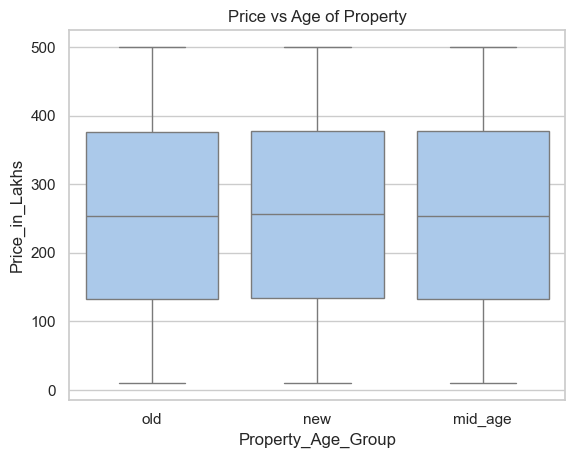

In [9]:
#Age Group vs Price
sns.boxplot(x="Property_Age_Group", y="Price_in_Lakhs", data=df) 
plt.title("Price vs Age of Property")
plt.show()


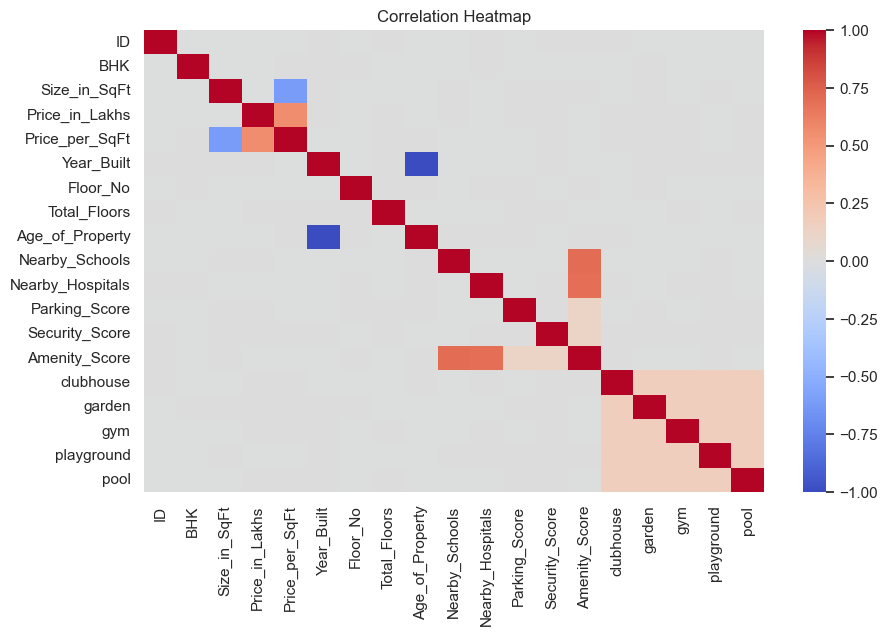

In [10]:
#Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=["float64","int64"]).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


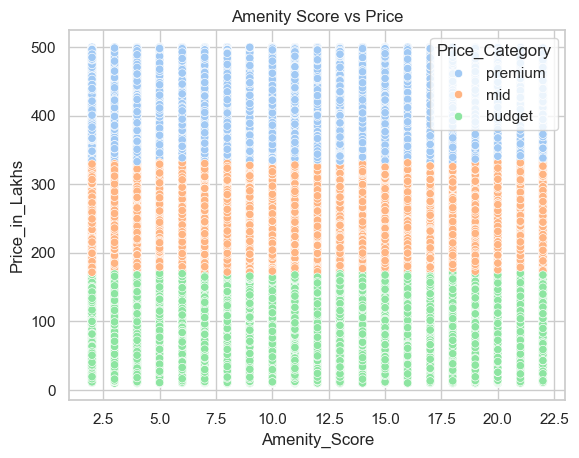

In [11]:
#Investment-Oriented Insights
#Amenity Score vs Price
sns.scatterplot(x="Amenity_Score", y="Price_in_Lakhs", hue="Price_Category", data=df)
plt.title("Amenity Score vs Price")
plt.show()


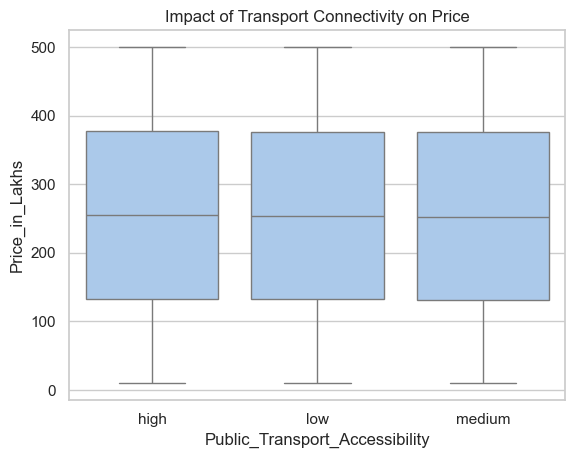

In [12]:
#Public Transport Accessibility Impact
sns.boxplot(x="Public_Transport_Accessibility", y="Price_in_Lakhs", data=df)
plt.title("Impact of Transport Connectivity on Price")
plt.show()


In [13]:
df.corr(numeric_only=True)["Price_in_Lakhs"].sort_values(ascending=False).head(6)


Price_in_Lakhs    1.000000
Price_per_SqFt    0.555781
Security_Score    0.003808
Year_Built        0.002714
gym               0.001945
pool              0.001753
Name: Price_in_Lakhs, dtype: float64